## Creating a combined quality dataset

In this notebook we make a quality dataset out of the three datasets "recipes", "reviews" and "recipes_with_search_terms". In order to give some interesting insights of the data.

Therefore, we:
- left joined them on `RecipeId` 
- considered only the recipes with count(ratings) >= 10
- introduced a column `Average rating` which is an average of all reviews for this recipe 
- and a column `Number of ratings` which is a number of data records in reviews.csv for this recipe
- calculated an Overall Mean:
  - Calculates the mean of all ratings across the entire DataFrame
  - Assigns this overall mean to a new column 'average_rating' for all rows
- calculated a Per-Recipe Mean (mean_of_all_ratings in the loop):
  - For each recipe, calculates the mean of ratings for all rows with the same 'RecipeId'
  - Assigns this per-recipe mean to the 'average_rating' column for the corresponding row

In [1]:
# load all datasets
import pandas as pd

recipes = pd.read_csv("data/recipes.csv")
reviews = pd.read_csv("data/reviews.csv")
search_terms_and_tags = pd.read_csv("data/recipes_w_search_terms.csv")

In [3]:
reviews.shape

(1401982, 8)

In [20]:
# 2. Combine all recipes that are present in BOTH recipes.csv and recipes_w_search_terms.csv 
# as one dataset (we have RecipeId/id as primary key). Delete the unnecessary columns (see below). 
# There are columns Name, Description that are present in both datasets. We just take the values from one dataset (doesn't matter which).
# The column we don't need: From recipes.csv: Images 

reviews.rename(columns={'AuthorId':'ReviewerId'}, inplace=True)
reviews.rename(columns={'AuthorName':'ReviewerName'}, inplace=True)
reviews.drop("DateSubmitted", axis=1, inplace=True)
reviews.drop("DateModified", axis=1, inplace=True)
reviews.head()

,ReviewId,RecipeId,ReviewerId,ReviewerName,Rating,Review
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ..."
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...
4,14,44,2085,Tony Small,5,An excellent dish.


In [21]:
recipes.rename(columns={'AuthorId':'RecipeContributerId'}, inplace=True)
recipes.rename(columns={'AuthorName':'RecipeContributorName'}, inplace=True)
recipes.drop("Images", axis=1, inplace=True)
recipes.drop("Name", axis=1, inplace=True)
recipes.drop("Description", axis=1, inplace=True)
recipes.head()

,RecipeId,RecipeContributerId,RecipeContributorName,CookTime,PrepTime,TotalTime,DatePublished,RecipeCategory,Keywords,RecipeIngredientQuantities,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [22]:
search_terms_and_tags.rename(columns={'id':'RecipeId'}, inplace=True)
search_terms_and_tags.head()

,RecipeId,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [23]:
#Merge all the datasets
df_combined = pd.merge(reviews, recipes, on='RecipeId', how="left")
df_combined = pd.merge(df_combined, search_terms_and_tags, on='RecipeId', how="left")
print(len(df_combined))
df_combined.head()

1401982


,ReviewId,RecipeId,ReviewerId,ReviewerName,Rating,Review,RecipeContributerId,RecipeContributorName,CookTime,PrepTime,...,RecipeInstructions,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,1545.0,Nancy Van Ess,NaN,PT30M,...,"c(""In a mixing bowl, combine cheeses, bacon an...",Jalapeno Pepper Poppers,"originally from ""Taste of Home"" magazine","['cream cheese', 'sharp cheddar cheese', 'mont...","[""8 ounces cream cheese, softened "",""4 ...",1 (42 g),24.0,"['In a mixing bowl, combine cheeses, bacon and...","['30-minutes-or-less', 'time-to-make', 'course...","{'appetizer', 'low-carb'}"
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",1920.0,Ruth Dearing,PT2H,PT5M,...,"c(""Combine all in a bowl and mix thoroughly."",...",Curry Dip,Great dip on raw vegetables. Very different b...,"['mayonnaise', 'salt', 'curry powder', 'black ...","[""1 1/2 cups mayonnaise or 1 1/2 cups ...",1 (4 g),4.0,"['Combine all in a bowl and mix thoroughly.', ...","['weeknight', 'time-to-make', 'course', 'prepa...",{'appetizer'}
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,1932.0,Sealoverz,PT30M,PT30M,...,"c(""Combine all ingredients for sauce in a quar...",Chinese Imperial Palace General Tso's Chicken,Yum,"['cornstarch', 'water', 'fresh garlic', 'fresh...","["""",""1/2 cup cornstarch"",""1/4 cup wate...",1 (352 g),8.0,['Combine all ingredients for sauce in a quart...,"['60-minutes-or-less', 'time-to-make', 'course...","{'low-calorie', 'healthy', 'low-fat', 'dinner'..."
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,1986.0,Kevin Connolly,PT3H20M,PT1H15M,...,"c(""Use a 14 to 20 qt. pan."", ""Coarsely chop en...",Kevin's Best Corned Beef,This is the best corned beef you will ever have.,"['onions', 'carrots', 'corned beef brisket', '...","[""1 3/4 lbs onions, spiced or unspiced "",""...",1 (631 g),12.0,"['Use a 14 to 20 qt. pan.', 'Coarsely chop eno...","['weeknight', 'time-to-make', 'course', 'main-...","{'irish', 'dinner'}"
4,14,44,2085,Tony Small,5,An excellent dish.,1596.0,Joan Edington,PT3M,PT35M,...,"c(""Melt 1 1/2 ozs butter, add the flour and co...",Chicken a la King,I copied this one out of a friend's book so ma...,"['chicken', 'butter', 'flour', 'milk', 'celery...","[""12 ounces chicken, cooked (in fairly l...",1 (634 g),2.0,"['Melt 1 1/2 ozs butter, add the flour and coo...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'low-sodium', 'low-carb', 'chicken'}"


In [25]:
# 3. For the recipes that we now have, take only those that have at least 10 reviews in reviews.csv.
# Introduce a column "Average rating" which is an average of all reviews for this recipe. 
# And a column "Number of ratings" which is a number of data records in reviews.csv for this recipe. 

df_combined = df_combined[df_combined.groupby('RecipeId')['RecipeId'].transform('size') >= 10]
print(len(df_combined))
df_combined['number_of_ratings'] = df_combined.groupby('RecipeId')['RecipeId'].transform('size')
df_combined.sample(5)

782363


,ReviewId,RecipeId,ReviewerId,ReviewerName,Rating,Review,RecipeContributerId,RecipeContributorName,CookTime,PrepTime,...,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,number_of_ratings
499898,542094,266427,107583,Outta Here,5,I will be making this often! Makes the kitche...,204024.0,Lavender Lynn,PT1H15M,PT30M,...,German Apple Bread,This recipe came from a friend of my mothers N...,"['eggs', 'brown sugar', 'white sugar', 'oil', ...","[""3 eggs, beaten "",""1 cup brown sug...",1 (1978 g),1.0,"['Heat oven to 325°F.', 'Mix all ingredients i...","['time-to-make', 'course', 'main-ingredient', ...","{'bread', 'german'}",24
192410,206285,78814,162826,Caroline Cooks,5,These Chicken Rolls are excellent. Just creamy...,89831.0,Kittencalrecipezazz,PT30M,PT25M,...,Kittencal's Chicken Crescent Roll Casserole,This will also work great with turkey; if you ...,['pillsbury refrigerated crescent dinner rolls...,"[""2 (8 ounce) cans Pillsbury Refrigerated ...",1 (195 g),8.0,"['Set oven to 350°F.', 'Butter a casserole dis...","['60-minutes-or-less', 'time-to-make', 'course...","{'casserole', 'dinner', 'chicken'}",486
979513,1121075,295984,47892,COOKGIRl,0,I had to doctor this up quite a bit for presen...,719083.0,tomsawyer,PT15M,PT15M,...,Spicy Moroccan Bread Salad,Another salad by Rachel Ray. You can substitut...,"['extra virgin olive oil', 'garlic cloves', 'g...","[""1/2 cup extra virgin olive oil"",""2 ...",1 (202 g),4.0,['Preheat the oven to 350 degrees Fahrenheit.'...,"['30-minutes-or-less', 'time-to-make', 'course...","{'low-sodium', 'vegetarian', 'salad', 'low-car...",11
266327,284894,121271,257993,-Sheri-,5,This was surprizingly very good. I was impres...,58104.0,Rita1652,NaN,PT5M,...,Maple Dijon Dressing,This dressing is great on a salad of baby gree...,"['light olive oil', 'salad oil', 'dijon-style ...","[""1/4 cup light olive oil"",""1/2 cup sa...",1 (47 g),8.0,['Blend together all ingredients. Add a teaspo...,"['15-minutes-or-less', 'time-to-make', 'course...","{'low-sodium', 'low-carb'}",24
1264409,1451431,73440,1803058197,bschie,4,This was really good and went very well with m...,101604.0,Gerald Norman,PT1H,PT3M,...,Beer Bread,"Per Google.com, the #1 recipe for Beer Bread i...","['flour', 'baking powder', 'salt', 'sugar', 'b...","[""3 cups flour (sifted)"",""3 teaspoons ...",1 (114 g),6.0,"['Preheat oven to 375 degrees.', 'Mix dry ingr...","['weeknight', 'time-to-make', 'course', 'cuisi...",{'bread'},1008


In [26]:
# this is inefficient but I cant come up with a cleaner solution
df_combined['average_rating'] = df_combined[["Rating"]].mean(axis=0)

for index,row in df_combined.iterrows():
    all_rows_with_this_recipie_id = df_combined[df_combined["RecipeId"] == row["RecipeId"]]
    mean_of_all_ratings = all_rows_with_this_recipie_id['Rating'].mean() 
    df_combined.loc[index, "average_rating"] = mean_of_all_ratings
df_combined.sample(5)

,ReviewId,RecipeId,ReviewerId,ReviewerName,Rating,Review,RecipeContributerId,RecipeContributorName,CookTime,PrepTime,...,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,number_of_ratings,average_rating
893175,1014556,64015,1374796,Lil_Mommy,5,"Worked great for us! We used almond milk, and ...",36944.0,Junebug,NaN,PT15M,...,"This recipe is quick, easy, dries hard and shi...","['powdered sugar', 'milk', 'light corn syrup',...","[""1 cup powdered sugar"",""2 teaspoons ...",1 (147 g),1.0,['Stir the powdered sugar and the milk until s...,"['15-minutes-or-less', 'time-to-make', 'course...","{'low-sodium', 'cookie', 'healthy', 'dessert',...",148,4.081081
1320419,2001861,303245,2797759,Paul S.,5,Had 2 back ribs that totaled about 5.5 pounds....,464080.0,januarybride,PT4H15M,PT5M,...,This is truly the ONLY rib recipe you will eve...,"['pork baby back ribs', 'barbecue sauce']","[""2 racks pork baby back ribs (our favori...",1 (398 g),4.0,"['Preheat oven to 225 degrees.', ""Season your ...","['course', 'main-ingredient', 'preparation', '...","{'dinner', 'low-carb', 'baked'}",146,4.000000
84286,91673,84325,82538,jenni2482,4,This recipe was very easy and had good flavor ...,31436.0,Chef Niki,PT20M,PT5M,...,This recipe was a side dish at a restraunt we ...,"['baby spinach', 'lemons%2c juice of', 'garlic...","[""1 (24 ounce) bag Baby Spinach"",""1 1/2 ...",1 (140 g),4.0,"['In large pot, add olive oil, butter, garlic ...","['30-minutes-or-less', 'time-to-make', 'course...","{'low-sodium', 'low-calorie', 'vegetarian', 'l...",44,4.590909
132096,141932,91952,169128,orlfane9,5,First time making lamb chops for me. This was ...,68960.0,Jewelies,PT1H,PT30M,...,Easy lamb chops Italian style.\r\n\r\nThis rec...,"['breadcrumbs', 'parmesan cheese', 'garlic clo...","[""1 cup breadcrumbs"",""1/2 cup parmesa...",1 (954 g),4.0,"['Preheat oven to 190°C (375°F).', 'Mix togeth...","['time-to-make', 'course', 'main-ingredient', ...","{'lamb', 'dinner', 'low-sodium'}",11,4.727273
728881,803508,40497,1157866,mvitadolce,5,"These are just as good as deep fried, actuall...",24386.0,Marie,PT45M,PT20M,...,This is a very tasty way to make wings. You ca...,"['flour', 'paprika', 'garlic salt', 'black pep...","[""1/3 cup flour"",""1 tablespoon paprik...",1 (146 g),4.0,"['Cut wings at joints.', 'Preheat oven to 425 ...","['weeknight', 'time-to-make', 'course', 'main-...","{'appetizer', 'low-sodium', 'low-carb', 'chick...",296,4.128378


In [1]:
df_combined.shape

NameError: name 'df_combined' is not defined

## Data Visualization

782363


array([[<Axes: title={'center': 'average_rating'}>]], dtype=object)

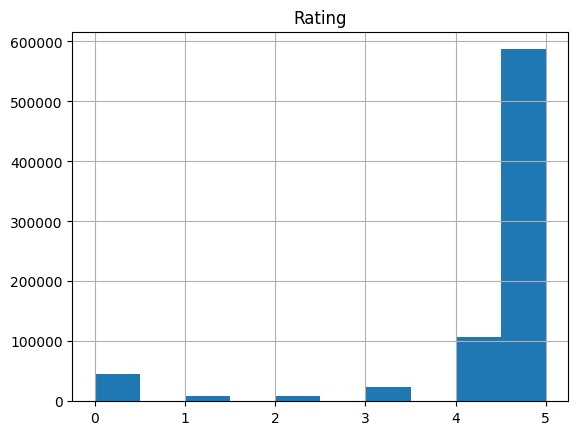

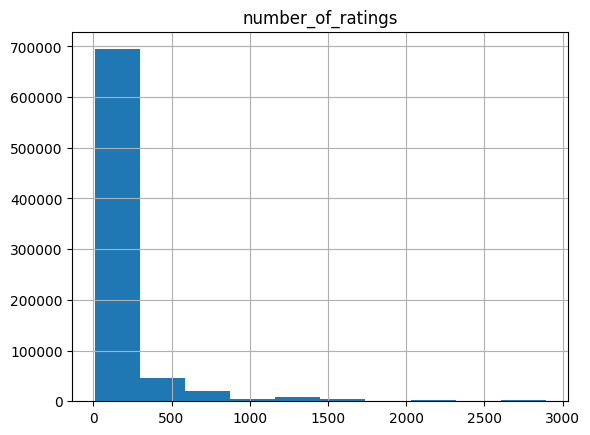

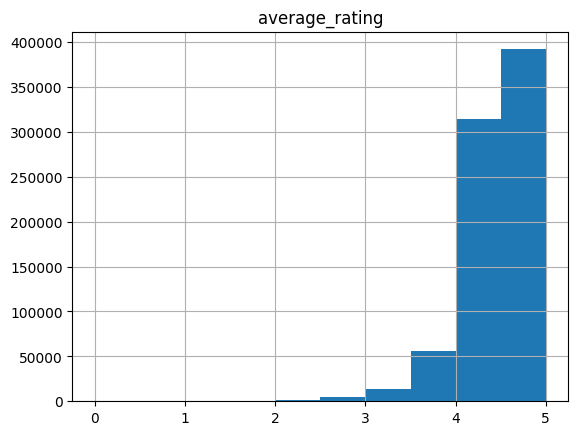

In [27]:
# 4. So now we have a dataset with columns from recipes.csv and recipes_w_search_terms.csv, 
# and two additional columns: "Average rating" and "Number of ratings". Depending on the number of
# records that we now have, either leave the dataset as this, or sample a subset. 
print(len(df_combined))

df_combined.hist(column='Rating')
df_combined.hist(column='number_of_ratings')
df_combined.hist(column='average_rating')



In [28]:
df_combined.to_csv("data/combined_data.csv")